<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/Comparative_ANNs/PSD_histogram_CNN_B_augmentation_r_squared_jul_13_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing import image
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 4.3MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 361, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 361 (delta 38), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (361/361), 202.49 MiB | 20.53 MiB/s, done.
Resolving deltas: 100% (155/155), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 163 (delta 65), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 22.02 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)
Img_Size = 28

In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     184   89.517014   89.525978  ...   92.689980  132.370026  138.376175
1     125  141.675079  137.414978  ...    1.263296    1.679296    0.799296
2     189  168.561050  174.379974  ...  119.043900  113.015091  111.094650
3     153  154.321457  157.486237  ...    0.654406    0.314537    1.399504
4     129   47.635300   93.481216  ...  198.395706  187.200943  175.586014
5     123    1.734748    0.861855  ...  118.872177  126.666008  103.231155
6     139  145.962006  121.662750  ...  113.816933  127.923866  126.497025
7     117  126.119080  123.296814  ...  146.031418  147.529556  143.822052
8     184  132.791580  128.039688  ...    0.000000    0.604442    1.327504
9     149  125.686646  131.302795  ...  118.891640  109.933525  108.449715
10    166  177.168518  185.945129  ...  151.514145  154.581070  162.414703
11    185   39.851044   63.968376  ...  156.719711  156.224213  158.861221
12    138  176.638504  17

In [11]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [12]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 163 (delta 65), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 18.78 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [13]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [14]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [15]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = 'Augmentation and 3 layers of Convolution: 32, 64, 128 '
N1 = 200
N2 = 10


# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:

# gives us back a <keras.callbacks.History object at 0x112e61a90>
model.fit(X_train, Y_train, epochs=200, batch_size=32)


Epoch 1/200
11/11 [==============================] - 48s 18ms/step - loss: 0.6476 - accuracy: 0.6750
Epoch 2/200
11/11 [==============================] - 0s 7ms/step - loss: 0.3429 - accuracy: 0.8521
Epoch 3/200
11/11 [==============================] - 0s 7ms/step - loss: 0.2848 - accuracy: 0.8812
Epoch 4/200
11/11 [==============================] - 0s 7ms/step - loss: 0.1980 - accuracy: 0.9284
Epoch 5/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0862 - accuracy: 0.9776
Epoch 6/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0859 - accuracy: 0.9715
Epoch 7/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0693 - accuracy: 0.9830
Epoch 8/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0263 - accuracy: 0.9979
Epoch 9/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0248 - accuracy: 0.9936
Epoch 10/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0515 - accuracy: 0.9766
Epoch 1

In [17]:

# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 5
data_generator = image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, Y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

model.fit(train_generator, validation_data=(X_test, Y_test), steps_per_epoch=steps_per_epoch, epochs=200)

Epoch 1/200
68/68 [==============================] - 3s 23ms/step - loss: 0.7968 - accuracy: 0.6361 - val_loss: 58.1959 - val_accuracy: 0.5102
Epoch 2/200
68/68 [==============================] - 1s 8ms/step - loss: 0.4124 - accuracy: 0.8432 - val_loss: 177.0053 - val_accuracy: 0.5102
Epoch 3/200
68/68 [==============================] - 1s 8ms/step - loss: 0.4157 - accuracy: 0.8609 - val_loss: 0.6967 - val_accuracy: 0.5102
Epoch 4/200
68/68 [==============================] - 1s 8ms/step - loss: 0.2284 - accuracy: 0.9112 - val_loss: 9.2126 - val_accuracy: 0.5102
Epoch 5/200
68/68 [==============================] - 1s 8ms/step - loss: 0.2370 - accuracy: 0.9083 - val_loss: 146.6022 - val_accuracy: 0.5102
Epoch 6/200
68/68 [==============================] - 1s 8ms/step - loss: 0.3676 - accuracy: 0.8402 - val_loss: 0.7004 - val_accuracy: 0.5102
Epoch 7/200
68/68 [==============================] - 1s 8ms/step - loss: 0.2574 - accuracy: 0.9083 - val_loss: 82.9100 - val_accuracy: 0.5102
Epoch 

In [18]:
# X_train.shape
steps_per_epoch

68

In [19]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
model.fit(X_train, Y_train, epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0137 - accuracy: 0.9971
Epoch 2/200
11/11 [==============================] - 0s 8ms/step - loss: 0.0103 - accuracy: 0.9971
Epoch 3/200
11/11 [==============================] - 0s 8ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 4/200
11/11 [==============================] - 0s 8ms/step - loss: 0.0092 - accuracy: 0.9971
Epoch 5/200
11/11 [==============================] - 0s 8ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 6/200
11/11 [==============================] - 0s 8ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 7/200
11/11 [==============================] - 0s 8ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 8/200
11/11 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 9/200
11/11 [==============================] - 0s 9ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 10/200
11/11 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 11/

In [20]:
Y_test = yback(Y_test)

In [21]:
pred_test= model.predict_classes(X_test)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predict   0   1
Actual         
0        70   2
1         1  74


In [22]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [23]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction = model.predict_classes(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


    Width           0           1  ...         781         782         783
0   179.0  128.355896  134.201019  ...    0.278518    0.905902    0.641990
1   167.0   73.104454   73.209877  ...   93.896088   94.443657   88.234688
3   148.0   53.941566   53.861214  ...    6.955443    1.388605    0.352812
4   189.0   55.537720   56.871056  ...   78.513031   67.279839   39.524006
5   104.0   56.096161   56.142017  ...   71.531067   75.616859   78.566574
6   133.0   83.930748   82.711914  ...   60.193909   58.324100   65.814407
7   177.0   74.865936   76.760979  ...   55.872543   61.668289   68.452484
12  146.0    0.162882    0.142616  ...   77.893227   70.931320   65.676674
14  171.0   62.799183   64.504395  ...    0.169488    0.000000    0.169488
15  165.0   90.939613  102.888046  ...   66.648743   69.279121   72.063766
16  188.0   64.773193   38.411499  ...    9.999093    3.201448    0.212766
18  102.0  105.796242  131.442535  ...   58.624378   54.760098   44.154175
22  160.0   83.107498   7

In [24]:
Width=np.array(Width_new)

In [25]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 630, done.
remote: Counting objects: 100% (391/391), done.
remote: Compressing objects: 100% (389/389), done.
remote: Total 630 (delta 241), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (630/630), 5.29 MiB | 7.27 MiB/s, done.
Resolving deltas: 100% (378/378), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [26]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 6.08 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [27]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [28]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,179.0,128.355896,134.201019,127.940483,107.498550,80.812714,67.831779,67.161636,66.719017,68.405540,74.711334,87.123505,81.718170,58.052055,48.020538,55.396397,67.284294,79.587875,89.900040,99.896477,101.354118,95.750290,64.779282,50.689804,47.925098,46.950092,45.763622,42.315067,52.879341,124.592270,135.129532,134.157959,119.649544,81.069130,64.120415,55.896820,56.287254,56.579445,63.535282,76.773132,...,20.274618,1.422584,0.701227,0.391374,0.465903,0.793546,0.553104,0.381886,0.000000,0.701476,2.919322,0.591305,0.888143,1.306108,2.127711,1.454262,1.422115,1.856621,1.528167,3.025062,16.176180,51.993412,75.975807,88.637474,85.975807,75.475266,51.040886,11.227273,1.366031,0.551887,0.170407,0.000000,0.024469,0.054243,0.078587,0.071658,0.000000,0.278518,0.905902,0.641990
1,167.0,73.104454,73.209877,73.980606,66.811249,58.485321,54.546135,50.789993,47.527847,40.913624,40.534195,42.793972,43.020439,43.194633,46.762920,47.774612,48.074299,48.514828,49.421497,48.154976,45.396538,41.271969,41.169064,39.637856,41.891861,46.859230,49.754421,49.392097,64.315178,72.787125,72.062973,68.277710,54.415691,50.091473,51.922161,49.544338,47.154369,44.890896,43.641010,42.931950,...,43.819141,41.978989,41.790386,43.811680,48.827248,54.756397,57.969204,57.387825,58.727531,57.572239,57.293812,52.555672,119.499809,117.823090,116.230171,113.747902,112.219414,102.465675,89.241104,71.294594,58.018970,39.911472,37.543625,41.032089,43.546989,43.136509,42.824345,45.194164,45.519958,50.029694,55.902401,64.442833,77.358353,86.508560,88.541046,88.091759,90.817604,93.896088,94.443657,88.234688
3,148.0,53.941566,53.861214,50.330173,45.357197,43.165085,47.290726,51.508404,57.365238,62.281963,64.193573,65.493797,65.298027,60.482109,60.332359,61.048946,60.506214,62.016808,62.139523,60.027031,57.185543,55.705624,50.930611,43.647923,32.392262,15.822500,3.709277,1.900657,1.920380,54.287075,51.196491,47.835648,46.507675,45.780865,48.713661,54.492332,61.128567,65.268082,66.756027,64.518631,...,93.450706,88.845154,66.357201,31.314829,23.849525,24.035061,21.170197,17.123447,13.785976,8.831994,1.584368,0.623813,112.905785,106.017540,99.861221,99.520821,102.088394,103.799866,92.506218,14.993427,6.902849,11.928415,18.710739,18.374727,62.660336,91.247635,94.771362,93.864868,93.365967,95.013153,94.344788,79.799133,39.980282,24.511322,20.473339,17.693937,13.882397,6.955443,1.388605,0.352812
4,189.0,55.537720,56.871056,60.448559,73.814812,92.522636,98.626900,102.274353,104.578880,107.165985,104.170097,101.032928,113.825798,117.234573,125.884781,128.846375,106.190674,101.735260,96.862831,86.454056,86.437584,89.005493,93.886147,93.345680,70.796982,58.812073,56.825783,54.835392,55.447189,57.776409,58.528126,61.894379,71.370377,84.421120,93.691360,102.460899,105.292183,105.953369,102.452682,101.213989,...,133.584366,129.257889,113.997253,82.908096,69.028801,70.598076,71.941017,72.486969,71.410149,68.820305,45.153637,35.773663,44.436214,43.769547,44.474625,41.629631,33.925926,22.984913,19.936901,21.495201,24.289440,34.004116,67.614540,82.733871,88.891632,104.532234,124.534988,146.255142,143.271606,134.632385,117.901245,88.743484,69.204391,69.237312,72.289436,74.980797,74.260628,78.513031,67.279839,39.524006
5,104.0,56.096161,56.142017,54.931953,53.124268,53.279587,52.612434,50.954151,53.513321,59.434910,69.186401,76.770721,78.664215,78.400894,82.965981,93.096169,97.810654,103.997055,103.144974,90.639061,82.326927,75.491127,75.926041,71.571014,71.208580,72.215988,72.872787,74.022194,73.711548,54.940834,54.315094,53.190834,54.110954,53.828411,53.602077,50.636101,51.011841,51.778114,57.011837,65.690834,...,59.356514,58.383141,60.134621,62.948235,65.301773,68.133141,69.551781,69.936401,70.529594,73.488174,76.9008

In [29]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

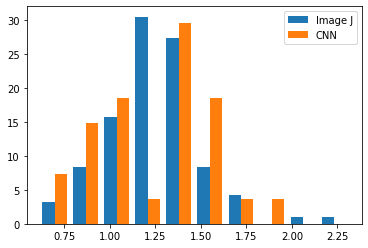

In [30]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

r_squared = 0.95487865257035


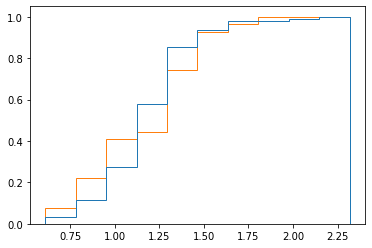

In [31]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [32]:
df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,'Details':Description},
                  index= [0])
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a list of 2 Lists of Patches objects>
[0.61145114 0.78204995 0.95264875 1.12324756 1.29384636 1.46444517
 1.63504397 1.80564278 1.97624158 2.14684039 2.31743919]
[[ 3.15789474  8.42105263 15.78947368 30.52631579 27.36842105  8.42105263
   4.21052632  0.          1.05263158  1.05263158]
 [ 7.40740741 14.81481481 18.51851852  3.7037037  29.62962963 18.51851852
   3.7037037   3.7037037   0.          0.        ]]


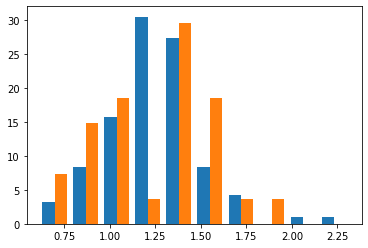

In [33]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [34]:
print(counts.sum())

200.0000000000001


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


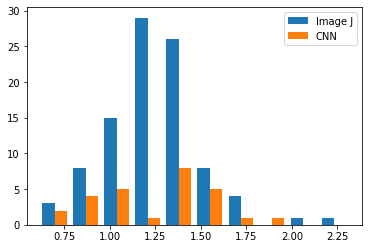

In [35]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [36]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1